In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sp
from scipy.optimize import minimize

In [3]:
#P1 load data
dark1 = np.load('dark1.npy')
dark2 = np.load('dark2.npy')
darktrue = np.load('darktrue.npy')

temp1 = np.load('temp1.npy')
print(temp1)
temp2 = np.load('temp2.npy')
temptrue = np.load('temptrue.npy')

[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]


In [65]:
x = np.array([1,1,1])
y= np.array([2,3,4])
print(x*y)

[2 3 4]


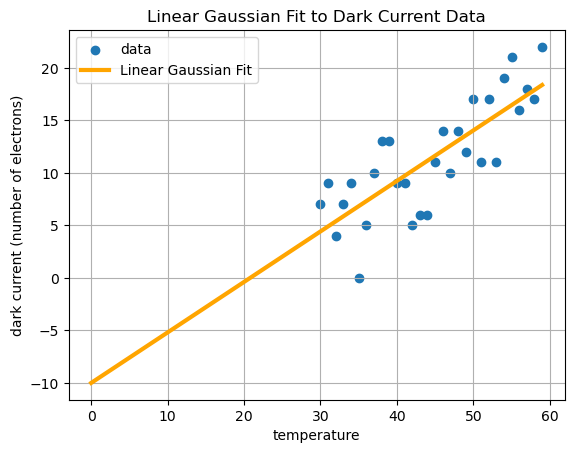

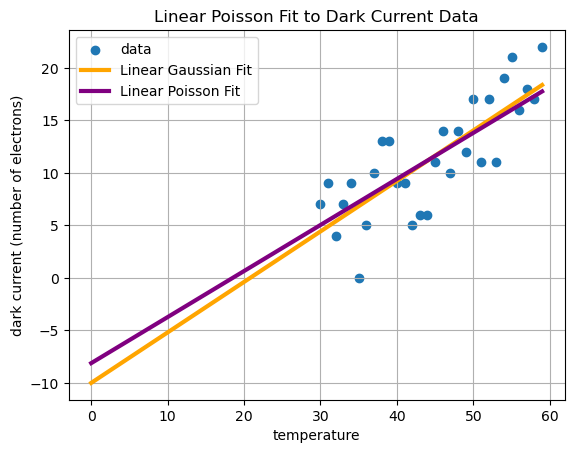

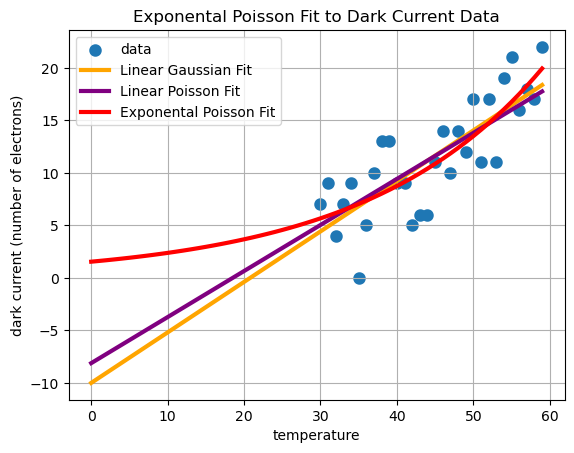

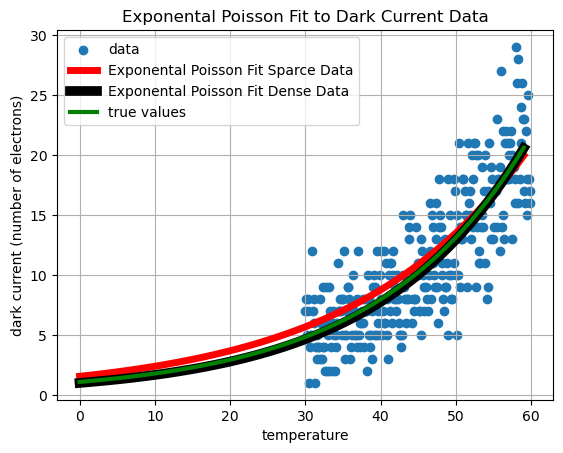

In [121]:
def ident(x):
    return x

def exp_func(x):
    return(np.e**x)
def linear_Model(params,x):
    return np.clip(params[0] + params[1]*x, 1e-8, None)
def linear_Model2(params,x):
    return params[0] + params[1]*x
def exp_Model(params,x):
    return np.exp(params[0] + params[1]*x)


def Linear_Gauss_obj_funct(params,y,x):
    return np.sum((y - (linear_Model(params,x)))**2)


def Linear_Poisson_obj_funct(params,y,x):
    mu = linear_Model(params,x)
    #print(mu)
    #print("++++++++++++++++++++")
    #print(mu- y*np.log(mu))
    return np.sum(mu- y*np.log(mu))  

def Exp_Poisson_obj_funct(params,y,x):
    mu = linear_Model(params,x)
    eta = np.exp(mu)
    #return np.sum(np.exp(eta)- y * eta)
    return np.sum(eta - y * mu)  


def Optimize_params(objective_function,Model,link_funct,link_funct_inverse,name,y,x,params_inital = np.array([0.01,0.01]), y_t="",x_t="", fig = ""):
    objective_function1 = lambda param: objective_function(param,y,x)
    result = minimize(objective_function1, params_inital, method='BFGS')
    # plt.scatter(x,y,label = "data")
    # plt.plot(x,Model(result.x,x), label = f"{name} Fit",color = "orange")
    # if not type(y_t)==str:
    #     plt.plot(x_t,y_t, label = f"true values",color = "green")
    # plt.xlabel("temperature")
    # plt.ylabel("dark current (number of electrons)")
    # plt.title(f"{name} Fit to Dark Current Data")
    # plt.grid(True)
    # plt.legend()
    # plt.show()
    if Model == linear_Model:
        return(linear_Model2(result.x,temptrue))
    else:
        return(Model(result.x,temptrue))

Linear_Gaussian = Optimize_params(Linear_Gauss_obj_funct,linear_Model,ident,ident,"Linear Gaussian",dark1,temp1)
Linear_Poisson = Optimize_params(Linear_Poisson_obj_funct,linear_Model,ident, ident,"Linear Poisson",dark1,temp1)
Exponental_Poisson = Optimize_params(Exp_Poisson_obj_funct,exp_Model,np.log,exp_func,"Exponental Poisson",dark1,temp1)

#Linear_Gaussian2 = Optimize_params(Linear_Poisson_obj_funct,linear_Model,ident, ident,"Linear Poisson",dark2,temp2, y_t=darktrue, x_t=temptrue)
#Linear_Poisson2 = Optimize_params(Exp_Poisson_obj_funct,exp_Model,np.log,exp_func,"Exponental Poisson",dark2,temp2, y_t=darktrue, x_t=temptrue)
Exponental_Poisson2 = Optimize_params(Exp_Poisson_obj_funct,exp_Model,np.log,exp_func,"Exponental Poisson",dark2,temp2, y_t=darktrue, x_t=temptrue)




plt.scatter(temp1,dark1,label = "data")
plt.plot(temptrue,Linear_Gaussian, label = f"Linear Gaussian Fit",color = "orange", linewidth=3)
plt.xlabel("temperature")
plt.ylabel("dark current (number of electrons)")
plt.title(f"Linear Gaussian Fit to Dark Current Data")
plt.grid(True)
plt.legend()
plt.show()



plt.scatter(temp1,dark1,label = "data")
plt.plot(temptrue,Linear_Gaussian, label = f"Linear Gaussian Fit",color = "orange", linewidth=3)
plt.plot(temptrue,Linear_Poisson, label = f"Linear Poisson Fit",color = "purple", linewidth=3)
plt.xlabel("temperature")
plt.ylabel("dark current (number of electrons)")
plt.title(f"Linear Poisson Fit to Dark Current Data")
plt.grid(True)
plt.legend()
plt.show()



plt.scatter(temp1,dark1,label = "data", linewidth=3)
plt.plot(temptrue,Linear_Gaussian, label = f"Linear Gaussian Fit",color = "orange", linewidth=3)
plt.plot(temptrue,Linear_Poisson, label = f"Linear Poisson Fit",color = "purple", linewidth=3)
plt.plot(temptrue,Exponental_Poisson, label = f"Exponental Poisson Fit",color = "red", linewidth=3)
#plt.plot(x_t,y_t, label = f"true values",color = "green")
plt.xlabel("temperature")
plt.ylabel("dark current (number of electrons)")
plt.title(f"Exponental Poisson Fit to Dark Current Data")
plt.grid(True)
plt.legend()
plt.show()


plt.scatter(temp2,dark2,label = "data")
plt.plot(temptrue,Exponental_Poisson, label = f"Exponental Poisson Fit Sparce Data",color = "red", linewidth=5)
plt.plot(temptrue,Exponental_Poisson2, label = f"Exponental Poisson Fit Dense Data",color = "black", linewidth=7)
plt.plot(temptrue,darktrue, label = f"true values",color = "green", linewidth=3)
plt.xlabel("temperature")
plt.ylabel("dark current (number of electrons)")
plt.title(f"Exponental Poisson Fit to Dark Current Data")
plt.grid(True)
plt.legend()
#plt.xlim(28,61)
plt.show()

0.98


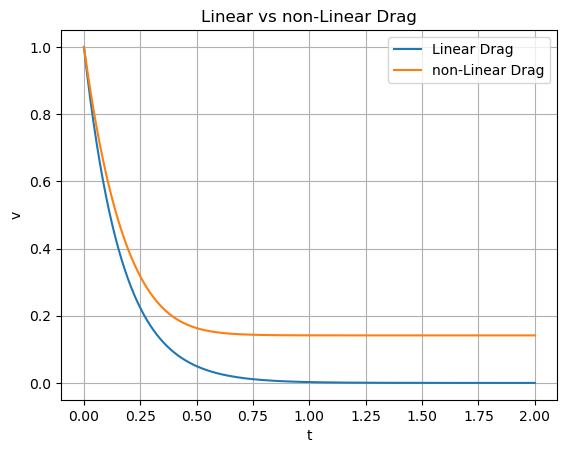

In [122]:

# P3d
pi = 1
mu = 1
r = 1
v_0 = 1
m = 1

eta2 = 0.1
mu2 = 5
v_02 = v_0 - (eta2/mu2)
print(v_02)
ts = np.linspace(0,2,1000)
linear_Drag = v_0*np.e**(-(6*pi*mu*r*ts)/m)
nonLin_drag = np.sqrt(v_02*np.e**(-2*mu2*ts/m)+(eta2/mu2) )
mu2 = 1
nonLin_drag_lin = np.sqrt(v_02*np.e**(-2*mu2*ts/m)+(eta2/mu2) )

plt.plot(ts, linear_Drag, label = "Linear Drag")
plt.plot(ts, nonLin_drag, label = "non-Linear Drag")
#plt.plot(ts, nonLin_drag_lin, label = "non-Linear Drag")
plt.xlabel("t")
plt.ylabel("v")
plt.title("Linear vs non-Linear Drag")
plt.grid(True)
plt.legend()